In [137]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fb['fb_roll_20'] = fb['close'].rolling('20D').min()

1.Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

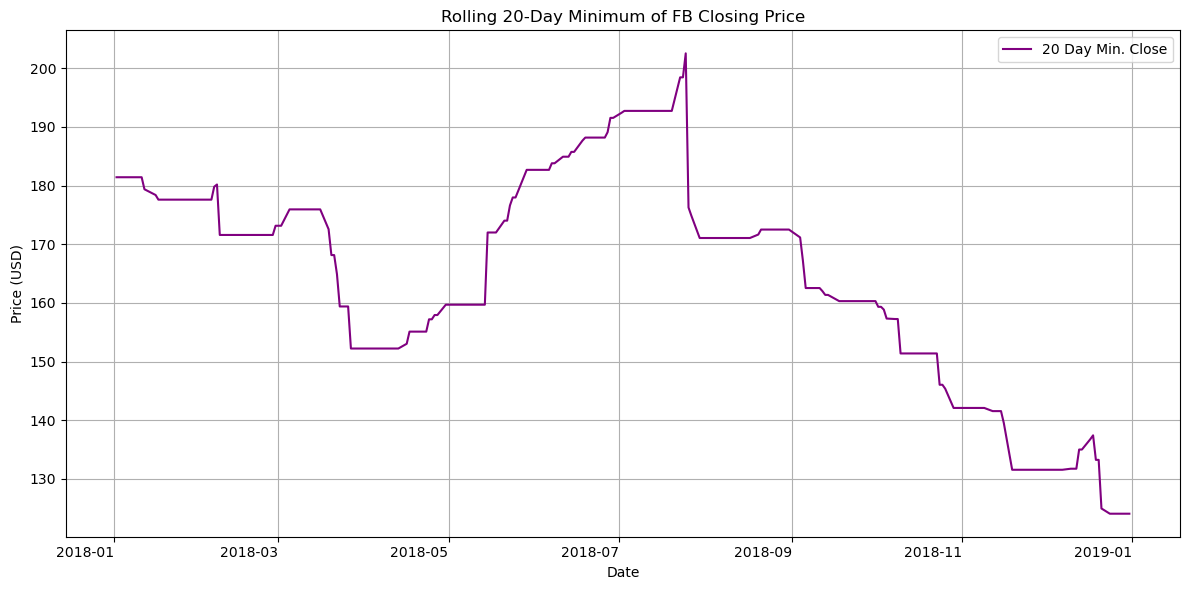

In [131]:
fig, ax = plt.subplots(figsize=(12, 6))

# For Plot
fb.plot(
    kind='line',
    y='fb_roll_20',
    style='purple',
    ax=ax,
    title='Rolling 20-Day Minimum of FB Closing Price',
)

# Label and Grid Settings
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend(['20 Day Min. Close'])
ax.grid(True)
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

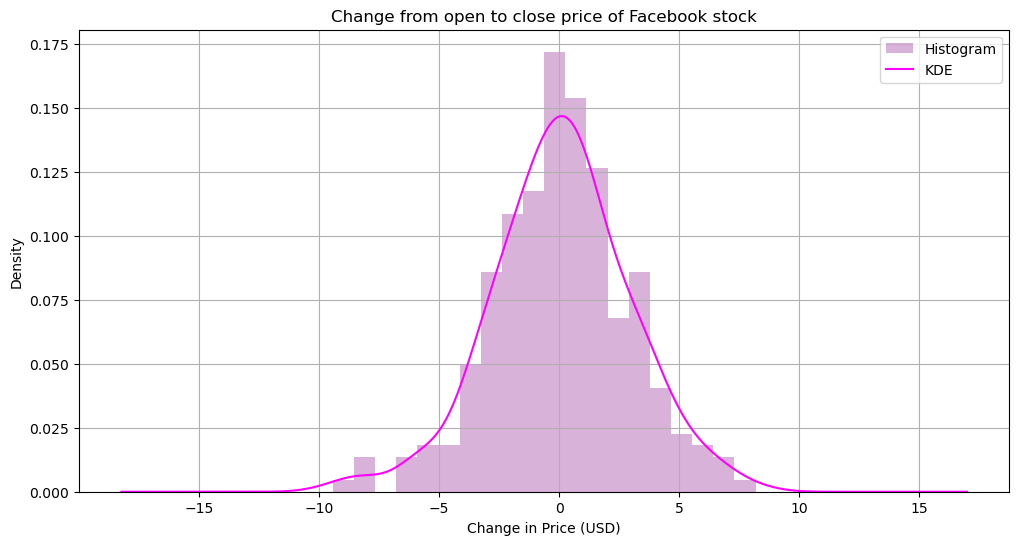

In [129]:
fig, ax = plt.subplots(figsize=(12, 6))

# Calculation formula for difference
fb['open_to_close'] = fb['close'] - fb['open']

# Plot for Histogram
fb['open_to_close'].plot(
    kind='hist',
    color='Purple',
    density=True,
    bins=20,
    alpha=0.3,
    ax=ax,
    title='Change from open to close price of Facebook stock'
)

# Plot for KDE
fb['open_to_close'].plot(
    kind='kde',
    color='Magenta',
    ax=ax 
)

# Labels and grid settings
ax.set_xlabel('Change in Price (USD)')
ax.legend(['Histogram', 'KDE'])
ax.grid(True, alpha=1)

plt.show()

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

In [135]:
# Setup
earthquakes = pd.read_csv('data/earthquakes-1.csv')
earthquakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [45]:
mag_indo = earthquakes.query('parsed_place == "Indonesia"')
mag_indo.head()

,mag,magType,time,place,tsunami,parsed_place
9,4.7,mb,1539472814760,"219km SSE of Saparua, Indonesia",0,Indonesia
13,4.5,mb,1539470898340,"120km SSW of Banda Aceh, Indonesia",0,Indonesia
180,5.2,mww,1539405255580,"25km E of Bitung, Indonesia",0,Indonesia
421,4.7,mb,1539331098920,"38km SSW of Nggongi Satu, Indonesia",0,Indonesia
660,4.4,mb,1539258833830,"51km WSW of Kasiguncu, Indonesia",0,Indonesia


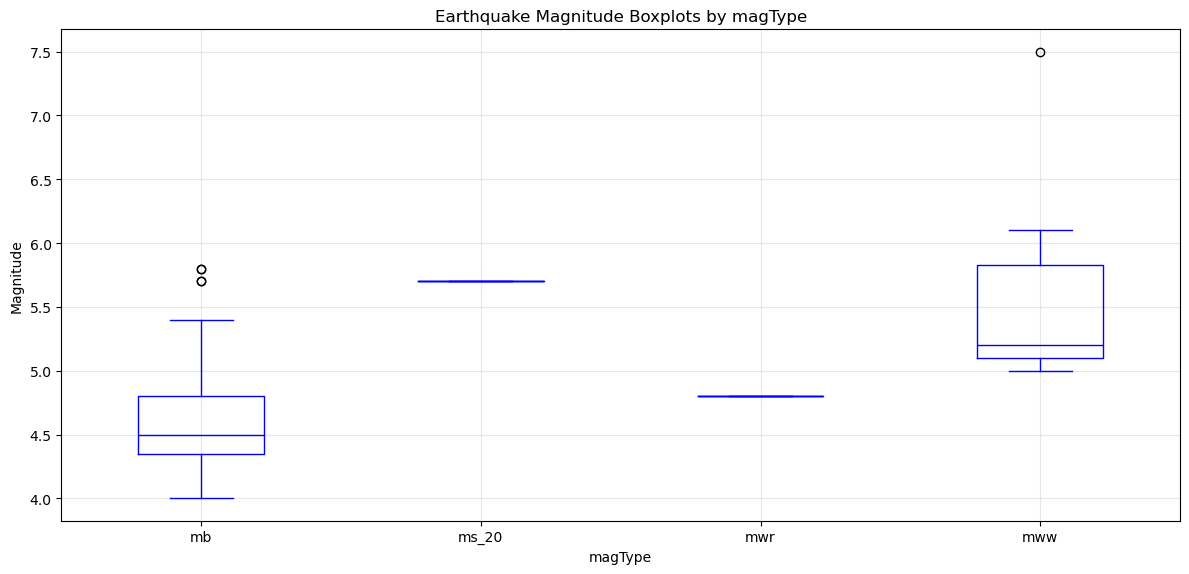

In [125]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot using ax
mag_indo.boxplot(
    column='mag',
    by='magType',
    color='blue',
    ax=ax
)

# Labels and Grid settings
ax.set_title('Earthquake Magnitude Boxplots by magType')
ax.set_ylabel('Magnitude')
ax.grid(True, alpha = 0.3)
plt.suptitle('') 

# Show the plot
plt.tight_layout()
plt.show()

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

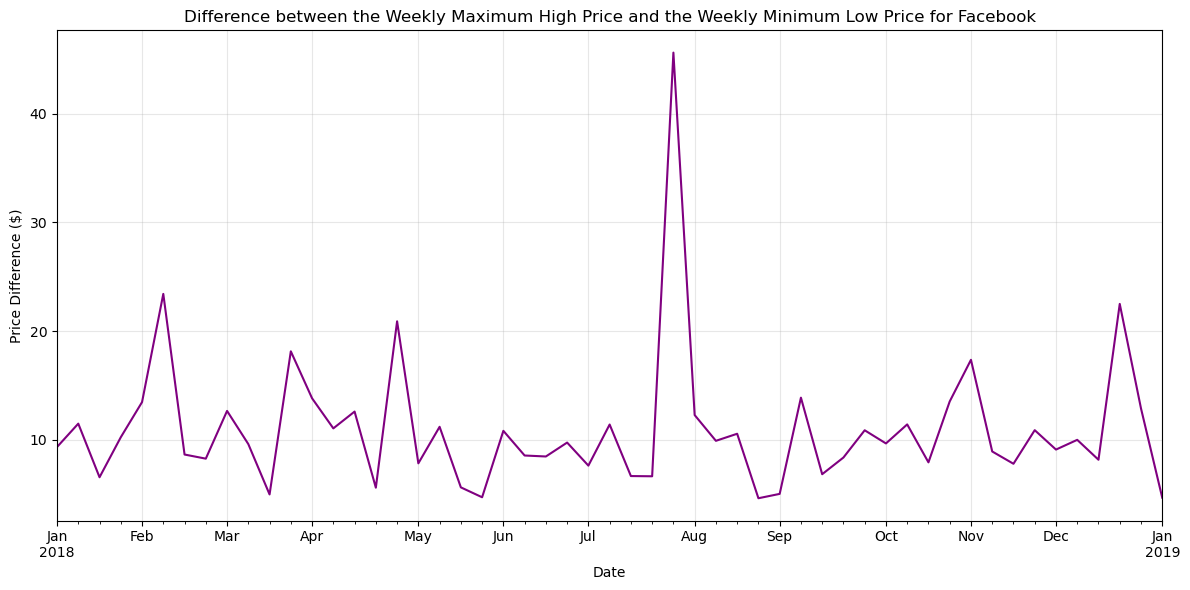

In [121]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot using the ax
fb_diff.plot(
    kind='line',
    y='max_high_min_low_diff',
    style='-',
    color='purple',
    legend=False,
    ax=ax,                
    title='Difference between the Weekly Maximum High Price and the Weekly Minimum Low Price for Facebook'
)

# Labels and Grid settings
ax.set_xlabel('Date')
ax.set_ylabel('Price Difference ($)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Panda  DataFrames for an easy way to do this) 

The second subplot will be a bar plot showing the net effect this had monthly, using resample).

Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (ed).

Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

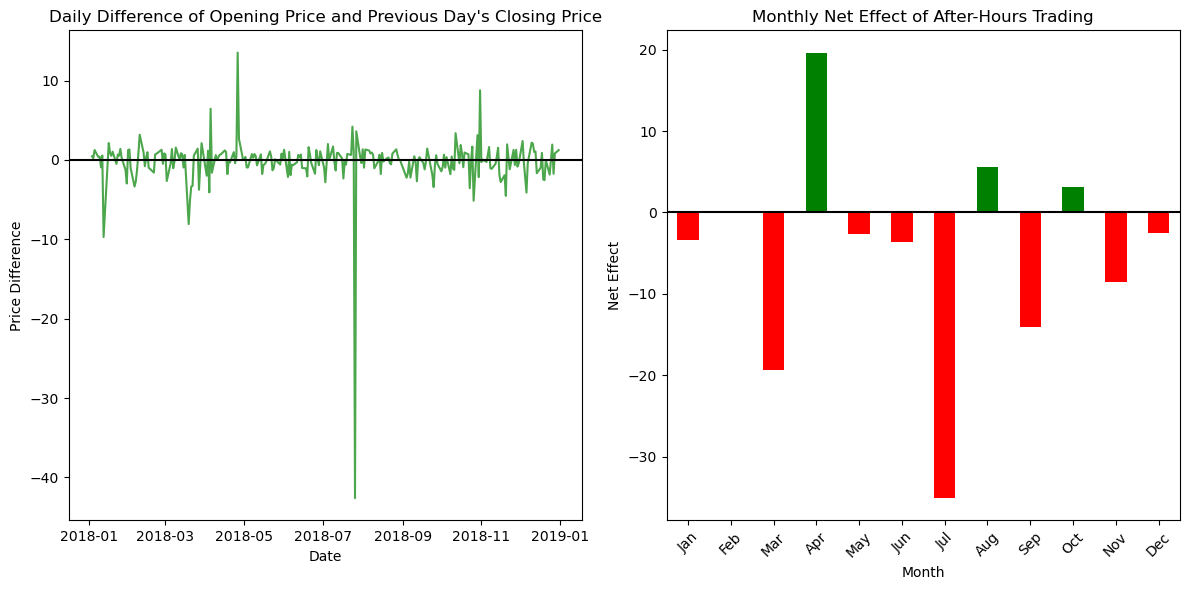

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Calculation formula for difference
fb['daily_diff_open_close'] = fb['open'] - fb['close'].shift(1)

# Plot 1
axs[0].plot(fb.index, fb['daily_diff_open_close'], color='green', alpha=0.7)
axs[0].set_title('Daily Difference of Opening Price and Previous Day\'s Closing Price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price Difference')
axs[0].axhline(0, color='black', linestyle='-')


# Plot 2
monthly_net_eff = fb.resample('ME')['daily_diff_open_close'].sum()

# Bonus 1(Visualization logic)
colors = ['green' if val >= 0 else 'red' for val in monthly_net_eff]  # green for gains, red for drops
monthly_net_eff.plot(kind='bar', ax=axs[1], color=colors)
axs[1].axhline(0, color='black', linestyle='-')

# Labels for plot 2
axs[1].set_title('Monthly Net Effect of After-Hours Trading')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Net Effect')
    
# Bonus 2(Threeletter abbrevation)
axs[1].set_xticks(range(len(monthly_net_eff)))  # Set positions for each month
axs[1].set_xticklabels([month.strftime('%b') for month in monthly_net_eff.index], rotation=45)

plt.tight_layout()
plt.show()